In [86]:
import os
import pathlib
from collections import defaultdict

import pandas as pd
import seaborn as sns
import tensorboard

from webeyetrack.constants import GIT_ROOT

CWD = pathlib.Path("").parent 
EXP_OUTPUTS_DIR = CWD / 'exp_outputs'
EYE_OF_THE_TYPER_EXP_DIR = EXP_OUTPUTS_DIR / '20250608221054-EyeOfTheTyper-test_affine_with_adam_n10_l-4'
EMBEDDING_SIZE_EXP_DIR = EXP_OUTPUTS_DIR / 'embedding_size'
os.makedirs(EXP_OUTPUTS_DIR, exist_ok=True)

OUTPUT_DIR = EXP_OUTPUTS_DIR / 'plots'
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [2]:
  
total_data = defaultdict(list)
for par_dir in (EYE_OF_THE_TYPER_EXP_DIR / 'per_participant').iterdir():
    for section_dir in par_dir.iterdir():
        data_file = f"{par_dir.stem}_metrics.csv"
        data = pd.read_csv(section_dir / data_file)

        total_data['participant'].append(par_dir.stem)
        total_data['section'].append(section_dir.stem)
        
        for col in data.columns:
            if col not in ['participant']:
                total_data[col].append(data[col].iloc[0])

total_df = pd.DataFrame(total_data)
total_df.head(10)

,participant,section,webGazerAvgL1,webEyeTrackAvgL1
0,P_01,study-dot_test,3.897109,3.299243
1,P_01,study-dot_test_final,9.562728,4.506078
2,P_02,study-dot_test,8.795707,4.837185
3,P_02,study-dot_test_final,11.736777,6.392345
4,P_06,study-dot_test,6.347425,5.856389
5,P_06,study-dot_test_final,16.169585,7.822558
6,P_07,study-dot_test,5.820472,8.121677
7,P_07,study-dot_test_final,12.477518,7.966867
8,P_08,study-dot_test,7.304759,15.231219
9,P_08,study-dot_test_final,17.157171,17.861156


In [15]:
# Generate the accuracy plots via boxplots
accuracy_df = total_df.copy()

# Rename 'webGazerAvgL1' and 'webEyeTrack' to 'WebGazer' and 'WebEyeTrack' respectively
accuracy_df.rename(columns={
    'webGazerAvgL1': 'WebGazer', 
    'webEyeTrackAvgL1': 'WebEyeTrack'
    }, 
    inplace=True
)

# Rename 'study-dot_test' and 'study-dot_test_final' to 'Dot Test' and 'Dot Test Final' respectively
accuracy_df['section'] = accuracy_df['section'].replace({
    'study-dot_test': 'Dot Test', 
    'study-dot_test_final': 'Dot Test Final'
})

# ['webGazerAvgL1', 'webEyeTrackAvgL1'] -> 'accuracy' with a 'class' column via melt
accuracy_df = accuracy_df.melt(id_vars=['participant', 'section'], 
                                value_vars=['WebGazer', 'WebEyeTrack'], 
                                var_name='class', value_name='accuracy')

# Remove outliers (95th percentile)
accuracy_df = accuracy_df[accuracy_df['accuracy'] < accuracy_df['accuracy'].quantile(0.95)]

accuracy_df.head(10)

,participant,section,class,accuracy
0,P_01,Dot Test,WebGazer,3.897109
1,P_01,Dot Test Final,WebGazer,9.562728
2,P_02,Dot Test,WebGazer,8.795707
3,P_02,Dot Test Final,WebGazer,11.736777
4,P_06,Dot Test,WebGazer,6.347425
5,P_06,Dot Test Final,WebGazer,16.169585
6,P_07,Dot Test,WebGazer,5.820472
7,P_07,Dot Test Final,WebGazer,12.477518
8,P_08,Dot Test,WebGazer,7.304759
9,P_08,Dot Test Final,WebGazer,17.157171


/tmp/ipykernel_2661117/3443122618.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.get_figure().show()


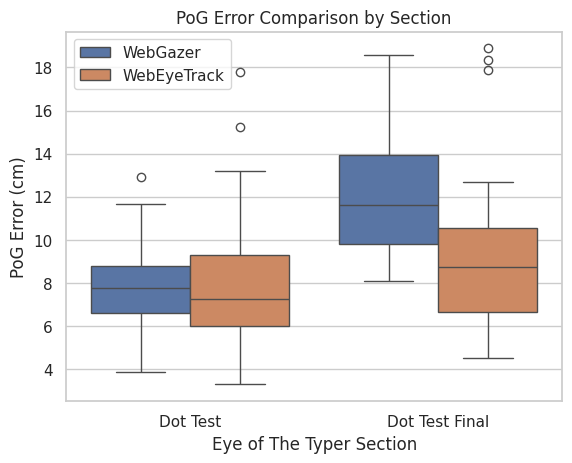

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=accuracy_df, x='section', y='accuracy', hue="class")
ax.set_title("PoG Error Comparison by Section")
ax.set_xlabel("Eye of The Typer Section")
ax.set_ylabel("PoG Error (cm)")

# In the legend, remove there is no need to show the text 'class' but keep the legend's information regarding the classes
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['WebGazer', 'WebEyeTrack'], loc='upper left')

# Save the plot as well
plot_path = OUTPUT_DIR / 'pog_error_comparison_by_section.png'
ax.get_figure().savefig(plot_path, bbox_inches='tight', dpi=400)
ax.get_figure().show()

In [23]:
# Generate the demographics plots using the Eye of the Typer demographics data
demographics_df = pd.read_csv(GIT_ROOT / 'data' / 'participant_characteristics.csv')
demographics_df.head(10)

,Participant ID,Participant Log ID,Date,Setting,Display Width (pixels),Display Height (pixels),Screen Width (cm),Screen Height (cm),Distance From Screen (cm),Screen Recording Start Time (Unix milliseconds),...,Self-Reported Eye Color,Facial Hair,Self-Reported Vision,Touch Typer,Self-Reported Handedness,Weather,Pointing Device,Notes,Time of day,Duration
0,P_01,1491423217564,4/5/2017,Laptop,1440,900,33.17,20.73,60.0,1.491424e+12,...,Dark Brown to Brown,NaN,Normal,Yes,Right,Cloudy,Trackpad,Did not see the button at the bottom of the Go...,16:00,16:40:00
1,P_02,1491487691210,4/6/2017,Laptop,1440,900,33.17,20.73,55.0,1.491488e+12,...,Dark Brown to Brown,NaN,Normal,No,Right,Indoors,Trackpad,NaN,10:00,22:43:00
2,P_07,1491577862552,4/7/2017,Laptop,1440,900,33.17,20.73,NaN,1.491580e+12,...,Dark Brown to Brown,NaN,Glasses,No,Right,Sunny,Trackpad,No video for the thankyou page,11:00,20:38:00
3,P_14,1491927757191,4/11/2017,Laptop,1440,900,33.17,20.73,65.0,1.491928e+12,...,Dark Brown to Brown,Beard,Normal,Yes,Right,Sunny,Mouse,NaN,12:00,18:22:00
4,P_15,1491933738937,4/11/2017,Laptop,1440,900,33.17,20.73,NaN,1.491934e+12,...,Dark Brown to Brown,NaN,Normal,No,Right,Sunny,Trackpad,No video for the thankyou page,14:00,14:56:00
5,P_24,1492106295971,4/13/2017,Laptop,1440,900,33.17,20.73,63.0,1.492107e+12,...,Dark Brown to Brown,NaN,Contacts,No,Left,Sunny,Mouse,NaN,14:00,18:54:00
6,P_28,1492182876610,4/14/2017,Laptop,1440,900,33.17,20.73,52.0,1.492183e+12,...,Dark Brown to Brown,NaN,Contacts,No,Right,Indoors,Trackpad,No video for the thankyou page. Went to Google...,11:00,19:26:00
7,P_29,1492189262993,4/14/2017,Laptop,1440,900,33.17,20.73,54.0,1.492190e+12,...,Dark Brown to Brown,Beard,Glasses,No,Right,Indoors,Trackpad,No video for the thankyou page,13:00,16:05:00
8,P_33,1492456607850,4/17/2017,Laptop,1440,900,33.17,20.73,69.0,1.492457e+12,...,Dark Brown to Brown,NaN,Normal,Yes,Right,Cloudy,Trackpad,No video for the thankyou page. No Tobii gaze ...,15:00,17:00:00
9,P_34,1492521777728,4/18/2017,Laptop,1440,900,33.17,20.73,51.0,NaN,...,Dark Brown to Brown,NaN,Normal,No,Right,Sunny,Trackpad,No screen recording,9:00,24:29:00


In [26]:
print(demographics_df.columns)

Index(['Participant ID', 'Participant Log ID', 'Date', 'Setting',
       'Display Width (pixels)', 'Display Height (pixels)',
       'Screen Width (cm)', 'Screen Height (cm)', 'Distance From Screen (cm)',
       'Screen Recording Start Time (Unix milliseconds)',
       'Screen Recording Start Time (Wall Clock UTC)', 'Gender', 'Age',
       'Self-Reported Race', 'Self-Reported Skin Color',
       'Self-Reported Eye Color', 'Facial Hair', 'Self-Reported Vision',
       'Touch Typer', 'Self-Reported Handedness', 'Weather', 'Pointing Device',
       'Notes', 'Time of day', 'Duration'],
      dtype='object')


In [29]:
# Assign the attributes such as "Age", "Gender", "Self-Reported Race", "Self-Reported Skin Color", and "Self-Reported Vision"
columns_to_add = [
    'Age',
    'Gender',
    'Self-Reported Race',
    'Self-Reported Skin Color',
    'Self-Reported Vision'
]
for i, row in accuracy_df.iterrows():
    participant = row['participant']
    demographics_row = demographics_df[demographics_df['Participant ID'] == participant]
    
    if not demographics_row.empty:
        for col in columns_to_add:
            accuracy_df.at[i, col] = demographics_row[col].values[0]

# Ensure to cast certain values to appropriate types
accuracy_df['Age'] = pd.to_numeric(accuracy_df['Age'], errors='coerce')

accuracy_df.head(10)

,participant,section,class,accuracy,Age,Gender,Self-Reported Race,Self-Reported Skin Color,Self-Reported Vision
0,P_01,Dot Test,WebGazer,3.897109,25.0,Male,Asian,1.0,Normal
1,P_01,Dot Test Final,WebGazer,9.562728,25.0,Male,Asian,1.0,Normal
2,P_02,Dot Test,WebGazer,8.795707,22.0,Male,Asian,1.0,Normal
3,P_02,Dot Test Final,WebGazer,11.736777,22.0,Male,Asian,1.0,Normal
4,P_06,Dot Test,WebGazer,6.347425,25.0,Female,White,1.0,Normal
5,P_06,Dot Test Final,WebGazer,16.169585,25.0,Female,White,1.0,Normal
6,P_07,Dot Test,WebGazer,5.820472,27.0,Female,Asian,4.0,Glasses
7,P_07,Dot Test Final,WebGazer,12.477518,27.0,Female,Asian,4.0,Glasses
8,P_08,Dot Test,WebGazer,7.304759,23.0,Male,White,1.0,Glasses
9,P_08,Dot Test Final,WebGazer,17.157171,23.0,Male,White,1.0,Glasses


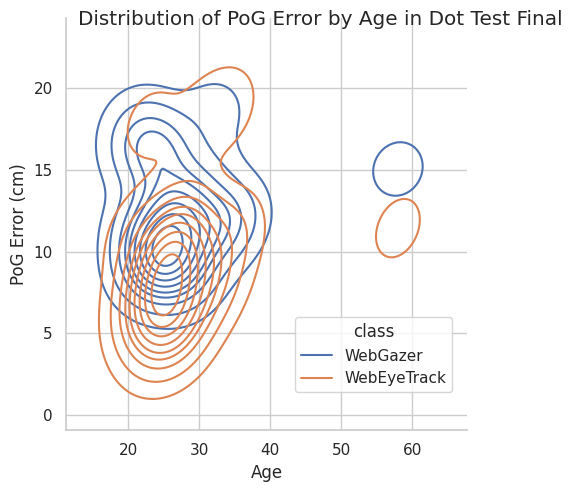

In [49]:
# Show a distribution of performance by age
final_dot_test = accuracy_df[accuracy_df['section'] == 'Dot Test Final']
sns.set_theme(style="whitegrid")
ax = sns.displot(data=final_dot_test, x="Age", y='accuracy', hue="class", kind="kde")
sns.move_legend(obj = ax, labels=['WebGazer', 'WebEyeTrack'], loc = 'lower left', bbox_to_anchor = (0.45, 0.20), frameon = True)
ax.fig.suptitle("Distribution of PoG Error by Age in Dot Test Final")

# Change the y-axis title to "PoG Error (cm)"
ax.set_axis_labels("Age", "PoG Error (cm)")

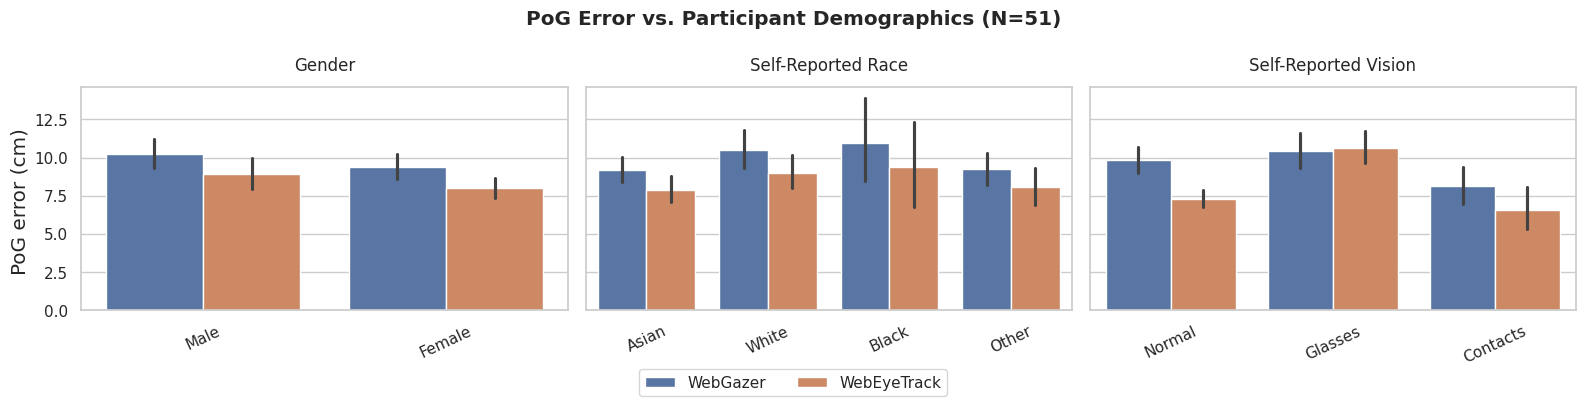

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------------------
# 1)  Tell the code which column goes in which panel and in what order
# ---------------------------------------------------------------------------
demographics = {
    'Gender'               : ['Male', 'Female'],
    'Self-Reported Race'   : ['Asian', 'White', 'Black', 'Other'],
    'Self-Reported Vision' : ['Normal', 'Glasses', 'Contacts']
}

# ---------------------------------------------------------------------------
# 2)  Build a 1×3 grid of barplots
# ---------------------------------------------------------------------------
fig, axes = plt.subplots(
        nrows=1, ncols=len(demographics),
        figsize=(16, 4),          # ← (a) wider figure – change numbers freely
        sharey=True               # common y-axis so bars are comparable
)

for ax, (col, order) in zip(axes, demographics.items()):
    sns.barplot(
        data=accuracy_df,
        x=col, y='accuracy', hue='class',
        order=order,              # stick to the categories listed above
        ax=ax
    )
    ax.set_ylabel("")
    ax.set_xlabel("")             # drop x-axis label (the title is enough)
    ax.set_title(col, pad=12)
    ax.tick_params(axis='x', rotation=25)
    ax.get_legend().remove()      # ← (b) remove *this* axis’ legend

# ---------------------------------------------------------------------------
# 3)  Figure-level polish
# ---------------------------------------------------------------------------
fig.suptitle("PoG Error vs. Participant Demographics (N=51)", weight='bold')
fig.supxlabel("")                 # no global x-label
fig.supylabel("PoG error (cm)", x=0.01)  # global y-label

# one shared legend centred above the plot (optional; delete if not wanted)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels))
fig.tight_layout()

# Save the plot
plot_path = OUTPUT_DIR / 'pog_error_vs_participant_demographics.png'
fig.savefig(plot_path, bbox_inches='tight', dpi=400)
plt.show()


In [107]:
# Load the tensorboard data to plot the embedding size comparisons
import tensorflow as tf
from tensorflow.core.util import event_pb2
# from tensorflow.python.summary.summary_iterator import summary_iterator

data = defaultdict(list)
for dir in EMBEDDING_SIZE_EXP_DIR.iterdir():
    if dir.is_dir():
        print(f"Found directory: {dir.name}")
        for file in dir.glob('events.out.tfevents.*'):
            serialized_examples = tf.data.TFRecordDataset(str(file))
            for serialized_example in serialized_examples:
                event = event_pb2.Event.FromString(serialized_example.numpy())
                for value in event.summary.value:
                    if 'train' in value.tag and 'ssim' in value.tag:
                        t = tf.make_ndarray(value.tensor)
                        # print(f"Tag: {value.tag}, Step: {event.step}, Value: {t}")
                        data['embedding_size'].append(dir.name.split('_')[1])  # Extract embedding size from directory name
                        data['step'].append(event.step)
                        data['value'].append(float(t))

# Trip any steps that are equal or larger than 20
embedding_size_df = pd.DataFrame(data)
embedding_size_df = embedding_size_df[embedding_size_df['step'] < 20]
embedding_size_df.head(10)

Found directory: mpiifacegaze_64
Found directory: mpiifacegaze_256
Found directory: mpiifacegaze_512
Found directory: mpiifacegaze_1024


2025-06-09 20:06:38.546528: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


,embedding_size,step,value
0,64,0,0.710901
1,64,1,0.756857
2,64,2,0.774386
3,64,3,0.784159
4,64,4,0.790300
5,64,5,0.795067
6,64,6,0.798258
7,64,7,0.800808
8,64,8,0.802944
9,64,9,0.804844


/tmp/ipykernel_2661117/3951611150.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.get_figure().show()


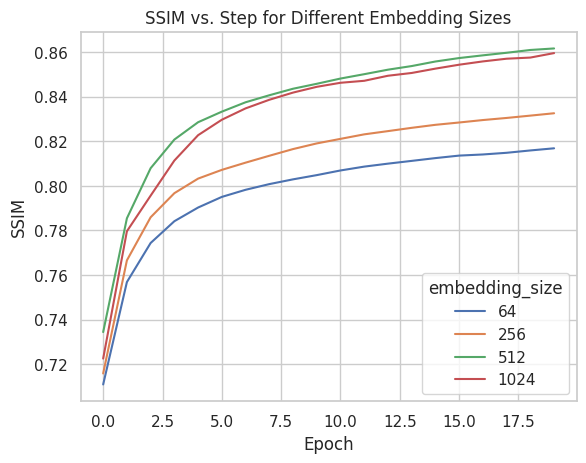

In [109]:
# Make a line plot of the embedding size vs. SSIM
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=embedding_size_df, x='step', y='value', hue='embedding_size')
ax.set_title("SSIM vs. Step for Different Embedding Sizes")
ax.set_xlabel("Epoch")
ax.set_ylabel("SSIM")
# Save the plot
plot_path = OUTPUT_DIR / 'embedding_size_vs_ssim.png'
ax.get_figure().savefig(plot_path, bbox_inches='tight', dpi=400)
ax.get_figure().show()